## DUY PHAM - MINERVA SCHOOLS AT KGI

## Moore’s law

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
#Processing data
data = pd.read_csv('benchmarks.txt', sep = ',')
new = data["testID"].str.split("-", n = 2, expand = True) 
data["date"] = new[1]
data.drop(columns =["testID", 'benchName', "peak"], inplace = True) 
data["date"] = pd.to_datetime(data["date"])
data["base"] = pd.to_numeric (data["base"])
data['date_difference'] = pd.Series(delta.days for delta in (data['date']-np.min(data['date'])))
data.dropna(inplace=True)
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,base,date,date_difference
0,19.40,1999-01-04,1069.0
1,27.20,1999-01-04,1069.0
2,10.10,1999-01-04,1069.0
3,8.58,1999-01-04,1069.0
4,8.94,1999-01-04,1069.0


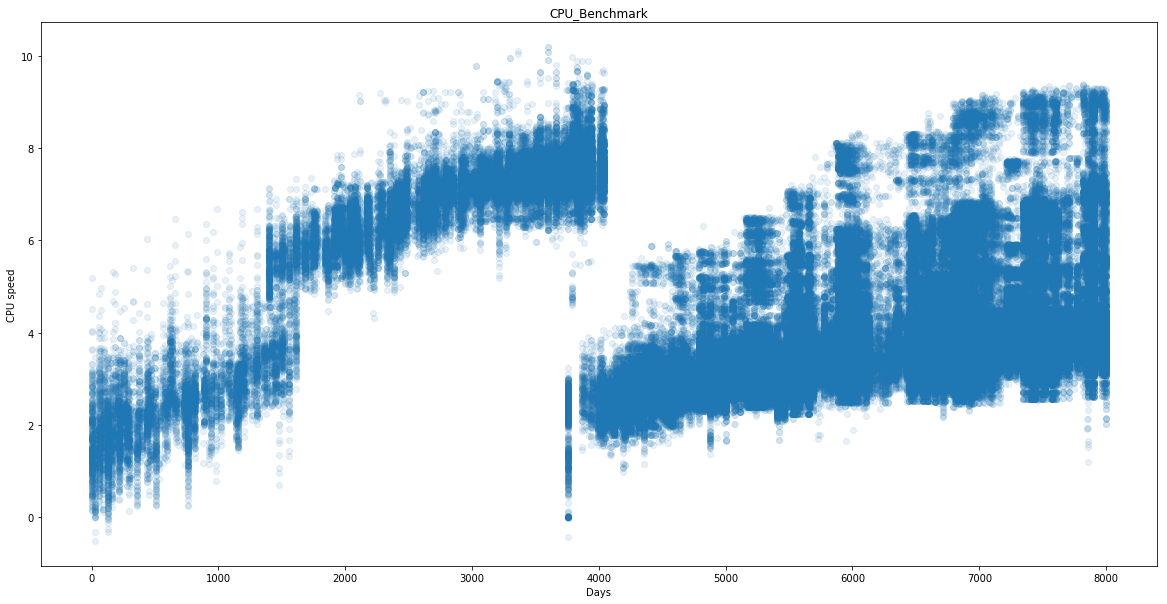

In [4]:
#Scatterplot of the CPU speed - Days
x = data["date_difference"]
y = np.log(data['base'])
plt.figure (figsize = (20,10))
plt.scatter (x, y, alpha = 0.1)
plt.xlabel ('Days')
plt.ylabel ('CPU speed')
plt.title ("CPU_Benchmark")
plt.show()

## Intepretation of the graph
The graph aboves shows that there are at least two diminishing returns in the relationship between CPU speed and days. From the beginning, the first diminishing return is after 1600 days and the second is around 4100 days. Because of these abrupt diminishing returns, if we use the linear regression technique to train the model, it is unlikely to correctly represent the dataset. I will do two things below:
-  Firstly, I will point out a poor result when using a pure regression technique to model the whole dataset. 
-  Secondly, I will train the model using linear regression for a range of dataset that does not include any diminishing returns. In this initial model, I will not separate the whole dataset into training and test set. Instead, I will see how the regression line represents the training set. 
-  Thirdly, I will separate the same dataset (used in the model above) into training set and test set. I will compare the metrics result between the model above (training set is the test set) and this new model (separating between training set and test set). 
-  R_2 and mean squared error will be used to measure the efficiency of the machine learning technique. 

### Using regression technique to model the whole dataset 

Coefficients: 
 [[-6.40136087e-05]]
Mean squared error: 2.38
Coefficient of determination: -194.35


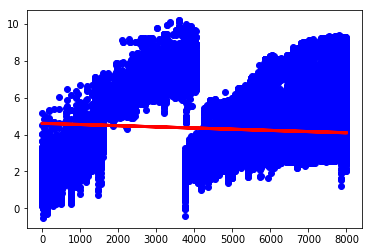

In [12]:
#Training the data without training set - test set. 
#This code blocks aims to check the robust of the use of linear regression to fit the data
x_train_1 = np.reshape((np.array(x)),(-1,1))
y_train_1 = np.reshape((np.array(y)),(-1,1))
regr = linear_model.LinearRegression()
regr.fit(x_train_1, y_train_1)
y_predict = regr.predict (x_train_1)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_predict, y_train_1))
# Coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_predict, y_train_1))

# Plot outputs
plt.scatter(x_train_1, y_train_1,  color='blue')
plt.plot(x_train_1, y_predict, color='red', linewidth=3)

plt.show()

#### Intepretation
With a large mean squared error (2.38), this model is not robust and fails to represent anything about the dataset. In addition, the $R^2$ score is -194, which is worse than the model that has a constant prediction of the expected value. One reason for this failure can be explained by the structure of the dataset: the scatter plot has an upward trend from 0 - 4000 days, followed by an abrupt drop before increasing again from 4100 days to 8000 days.

Intuitively speaking, the regression machine learning will perform better when there is no abrupt diminishing returns. Thus, I will apply the regression to only half of the dataset, ranging from 4100 - 8000 days. There seems to be no diminishing return in this range, giving hope for a successful regression technique. 

### Using the range of dataset that does not include any diminishing returns

Coefficients: 
 [[0.001373]]
Mean squared error: 0.53
Coefficient of determination: -6.49


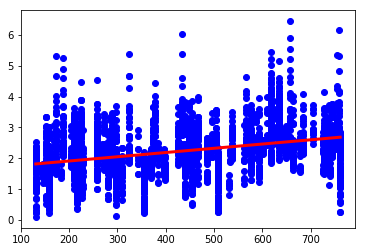

In [19]:
#Training the data without training set - test set. 
#This code blocks aims to check the robust of the use of linear regression to fit the data
x_train_2 = np.reshape((np.array(x)[4100:8000]),(-1,1))
y_train_2 = np.reshape((np.array(y)[4100:8000]),(-1,1))
regr = linear_model.LinearRegression()
regr.fit(x_train_2, y_train_2)
y_predict_2 = regr.predict (x_train_2)

#The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_predict_2, y_train_2))
# Coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_predict_2, y_train_2))

# Plot outputs
plt.scatter(x_train_2, y_train_2,  color='blue')
plt.plot(x_train_2, y_predict_2, color='red', linewidth=3)
plt.show()

#### Interpretation 
This machine learning technique has a better outcome. 
The mean squared error is only 0.53 compared to 2.38 MSE in the previous model. In addition, the $R^2$ score is also -6.49, which is better than the previous one, but worse than the constant model that predicts pure expected value. 

When looking in the graph, we can see a number of outliers that go away from the red line. This implies that the regression technique might not fully grasp the main idea of the dataset; giving room for other improvements. 

Noting that in this code block, I only measure how the regression ML represents the dataset. The separation into test set and training set below will give us an understanding of how accurate the prediction of regression ML is. 

### Using regression line with training set - test set

Coefficients: 
 [[0.00093885]]
Mean squared error: 0.69
Variance score: -0.23


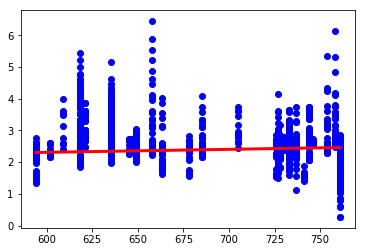

In [24]:
#Create training set and test set
x_train_3 = np.reshape(np.array(x[4100:7000]),(-1,1))
x_test_3 = np.reshape(np.array(x[7000:8000]),(-1,1))

y_train_3 = np.reshape(np.array(y[4100:7000]),(-1,1))
y_test_3 = np.reshape(np.array(y[7000:8000]),(-1,1))
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train_3, y_train_3)

# Make predictions using the testing set
y_pred_3 = regr.predict(x_test_3)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test_3, y_pred_3))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_3, y_pred_3))

# Plot outputs
plt.scatter(x_test_3, y_test_3,  color='blue')
plt.plot(x_test_3, y_pred_3, color='red', linewidth=3)

plt.show()

#### Interpretation
This model has quite similar mean squared error compared to the previous one; however, the $R^2$ score is significantly lower, staying at -0.23 instead of -6.49 of the previous one. One explanation for this improvement in $R^2$ score is the reduce of datapoints. The previous model has 4000 datapoints, with each datapoint stays far away from the regression line. In this model, most datapoints stay far away from the regression model. However, because there are fewer datapoints in this model compared to the previous one, the $R^2$ is reasonably lower than the previous one. 

This also means that the regression ML can represents the general trend but fails to capture the feature of each data point. 


#### Moore's law: 
Moore's law states that the number of transistors on a chip doubles every two year. Two-year period equals to 730 days. According to the best coefficient above, the Moore's law no longer applies to the current computer. 

The best coefficient that we calcualted is in the second model, with the coefficient staying at around 0.001373. If we multiply the coefficients with the number of days, the result is still around 1. This result implies that Moore's is no longer effective in recent computer production. 

## MNIST Digits

In [34]:
from sklearn import datasets, model_selection
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

digits = load_digits()
data = digits.images.reshape((1797,-1))
target = digits.target

<Figure size 432x288 with 0 Axes>

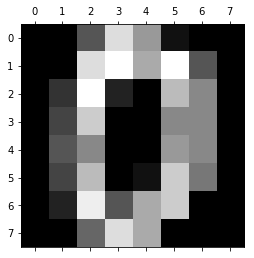

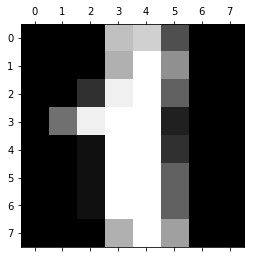

In [90]:
#Print some samples
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.matshow(digits.images[1]) 
plt.show()

In [83]:
#Create the function of choosing classes 
def choose_filter (target_1, target_2):
    two_filter = np.where((target == target_1) | (target == target_2))
    data_train, target_train = data[two_filter][:250],target[two_filter][:250]
    data_test,target_test = data[two_filter][250:],target[two_filter][250:]
    
#Classification function (using K-nearest-neighbors)
def classification (k, target_train, target_test, data_train, data_test):
    """k: number of neighbors to use in classication
    test_data: the data/targets used to test the classifier
    stored_data: the data/targets used to classify the test_data
    """
    classifier = KNeighborsClassifier(n_neighbors=k)  
    classifier.fit(data_train, target_train)

    y_pred = classifier.predict(data_test) 

    print(classification_report(target_test, y_pred))

In [84]:
choose_filter (3,7)
classification (5, target_train, target_test, data_train, data_test)

             precision    recall  f1-score   support

          3       1.00      0.95      0.97        56
          7       0.95      1.00      0.97        56

avg / total       0.97      0.97      0.97       112



Base on the result above, the precision for class "3" is 100% while the KNN correctly identifies 95% of the class "7". This seems to be a good result, which means that the KNN classification performs relatively well with these two classes. However, it does not mean that the same technique is equally good for all other set of classes. 